Mean temperature:  703.2241716923554


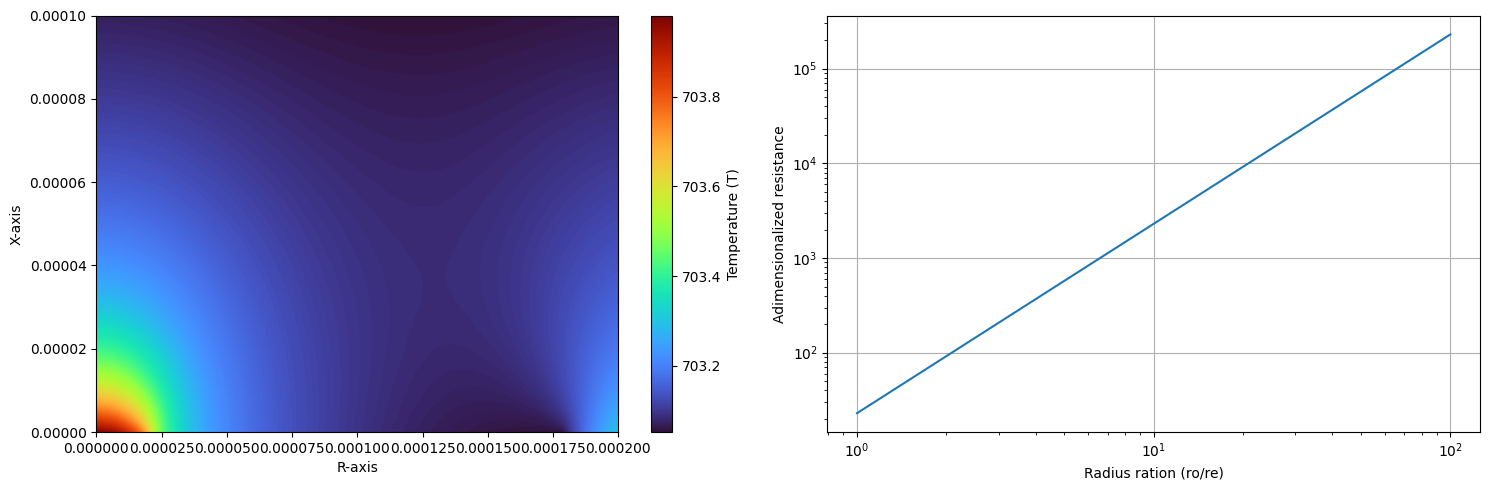

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j0, j1

ro = 200e-6
re = 21e-6
k = 168
q_flux = 1.5e7
Ts = 293

x_pos = np.linspace(0, 100e-6, 500)
r_pos = np.linspace(0, ro, 500)

domain_x, domain_r = np.meshgrid(x_pos, r_pos)

n_eigenvalues = 100
eigenvectors = 2 * np.pi * np.array([i for i in range(n_eigenvalues)]) / ro + 2.4

pi_sqrt = np.pi**0.5 * eigenvectors
I1i = (
    0.5
    * ro
    * (
        pi_sqrt * ro * j0(eigenvectors * ro) ** 2
        + pi_sqrt * ro * j1(eigenvectors * ro) ** 2
    )
    / pi_sqrt
)
I2i = re * j1(eigenvectors * re) / eigenvectors
Ci = q_flux * I2i / (k * eigenvectors * I1i)
T = (
    sum(
        ci * j0(ei * domain_r) * np.exp(-ei * domain_x)
        for ci, ei in zip(Ci, eigenvectors)
    )
    + Ts
)

T_bar = T[:, 0].mean()
print("Mean temperature: ", T_bar)

figs, axs = plt.subplots(1, 2, figsize=(15, 5))
sc = axs[0].scatter(domain_r, domain_x, c=T, cmap="turbo", s=2)
axs[0].set_xlim((domain_r.min(), domain_r.max()))
axs[0].set_ylim((domain_x.min(), domain_x.max()))

axs[0].set_ylabel("X-axis")
axs[0].set_xlabel("R-axis")
cbar = figs.colorbar(sc)
cbar.set_label("Temperature (T)")

axs[1].plot(
    np.linspace(1, 100, 100),
    (T_bar - Ts) * k * (np.linspace(1, 100, 100)) ** 2 / (q_flux * ro),
)
axs[1].set_ylabel("Adimensionalized resistance")
axs[1].set_xlabel("Radius ration (ro/re)")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].grid()

plt.tight_layout()
plt.show()